Data Preprocessing for Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import string
import nltk
from nltk.corpus import stopwords
from typing import List, Optional
import re


Import the data files and examine the data.

In [4]:
# job postings dataset
job_df = pd.read_csv('data/Fake_Real_Job_Posting.csv')
job_df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [5]:
# sms spam dataset
from datasets import load_dataset

ds= load_dataset("ucirvine/sms_spam")
sms_df = ds["train"].to_pandas()
sms_df.head(10)

c:\Users\Derick Sayavong\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [6]:
# email spam dataset
email_df = pd.read_csv("data/spam_Emails_data.csv")
email_df.head(10)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


Drop the 'Unnamed: 0' column as it doesn't bring any value to the job postings dataset and is numerical.

In [7]:
# job_df = job_df.drop(columns=['Unnamed: 0'])

job_df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


Check for Null values and drop them since only 1 present.

In [8]:
job_df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:

job_df.isna().sum()
job_df = job_df.dropna()

In [10]:
sms_df.isna().sum()

sms      0
label    0
dtype: int64

In [11]:
email_df.isna().sum()


label    0
text     2
dtype: int64

In [12]:
email_df = email_df.dropna()
email_df.isna().sum()

label    0
text     0
dtype: int64

Columns "title", "location", "requirements", "employment_type", "industry", "function" all contain text data relevant to the job posting. Therefore, let's merge them into one column of categorical data.

The data in the "fraudulent" column is in the format "Fake" or "Real". Since we're dealing with binary classification, let's convert it to binary format with 1-Fake, 0-Real.

In [13]:
job_df_clean = pd.DataFrame()
job_df_clean["text"] = job_df.drop(columns=['fraudulent']).astype(str).agg(' '.join, axis=1)
job_df_clean["fraudulent"] = job_df['fraudulent']
print(job_df_clean["fraudulent"].head(10))
# job_df_clean["fraudulent"] = job_df_clean["fraudulent"].map({"Fake": 1, "Real": 0})
job_df_clean.head(10)

6      0
15     0
23     0
98     1
102    0
134    0
153    0
160    0
179    0
197    0
Name: fraudulent, dtype: int64


,text,fraudulent
6,"7 Head of Content (m/f) DE, BE, Berlin ANDROID...",0
15,"16 VP of Sales - Vault Dragon SG, 01, Singapor...",0
23,"24 Vice President, Sales and Sponsorship (Busi...",0
98,"99 IC&E Technician US, , Stocton, CA Oil & Ene...",1
102,"103 Marketing Administrator GB, WAR, Coventry ...",0
134,"135 Senior Business Development Manager GB, , ...",0
153,"154 Senior Project Manager GB, , London Produc...",0
160,"161 Field Services Supervisor US, WI, Western ...",0
179,"180 Internal Recruiter GB, LND, London Playfai...",0
197,"198 Software developer IN, MP, Indore Software...",0


In [14]:
email_df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [15]:
email_df['label'] = email_df['label'].map({"Spam": 1, "Ham": 0})
email_df.head(10)

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached is the weekly deal report from 10 / 1...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze m...


In [16]:
job_df_clean['fraudulent'].value_counts()

fraudulent
0    702
1     72
Name: count, dtype: int64

Create a histogram of the distribution of counts of fraudulent/real job postings. Our data is highly skewed  with 17013 real postings and 866 fake ones.

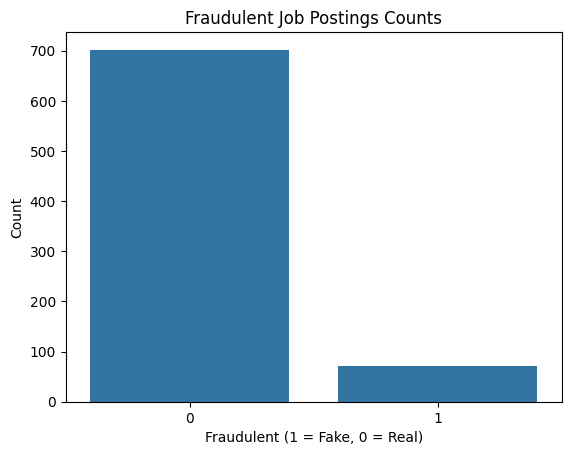

In [17]:
sns.countplot(data=job_df_clean, x="fraudulent")

plt.title("Fraudulent Job Postings Counts")
plt.xlabel("Fraudulent (1 = Fake, 0 = Real)")
plt.ylabel("Count")
plt.show()

In [18]:
sms_df["label"].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

Create a histogram of the distribution of counts of fake/real SMS. Our data is skewed  with 4827 real SMS and 747 spam ones.

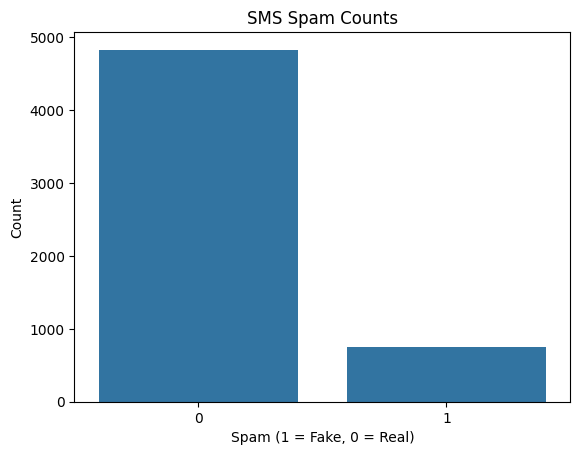

In [19]:
sns.countplot(data=sms_df, x="label")

plt.title("SMS Spam Counts")
plt.xlabel("Spam (1 = Fake, 0 = Real)")
plt.ylabel("Count")
plt.show()

In [20]:
email_df["label"].value_counts()

label
0    102159
1     91691
Name: count, dtype: int64

Create a histogram of the distribution of counts of fake/real emails. Our data is quite balanced with 102159 ham emails and 91691 spam ones.

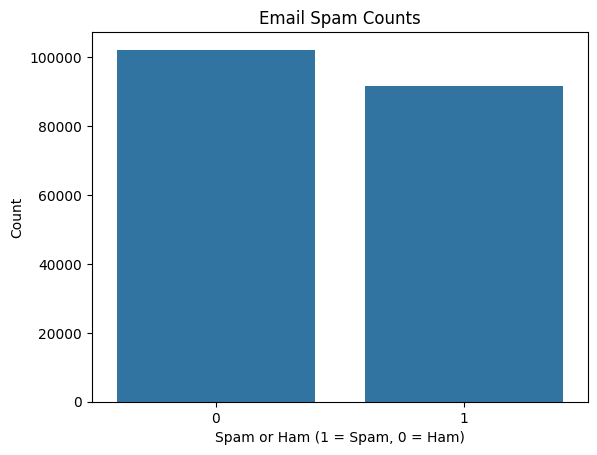

In [21]:
sns.countplot(data=email_df, x="label")

plt.title("Email Spam Counts")
plt.xlabel("Spam or Ham (1 = Spam, 0 = Ham)")
plt.ylabel("Count")
plt.show()

From our research about preprocessing data for fine-tuning BERT models, it's recommended not to remove stop words or punctuation or lemmatize. BERT computes text representations in context and removing stopwords and punctuation and lemmatizing would just mean removing context which BERT could have used to get better results. However, we're still creating two preprocessing functions one with stopwords and punctuation removed, one with stopwords and punctuation kept. In both, we're converting the text to lowercase, removing numerical characters, hyperlinks and extra whitespaces.

In [22]:
# with removing stop words and punctuation
def preprocess_remove_sw_punc(text):
	text = text.lower()  # convert to lowercase
	text = ''.join([char for char in text if not char.isdigit()]) # remove numerical characters
	text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
	text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

	stop_words = set(stopwords.words('english'))

	text = ' '.join([word for word in text.split() if word not in stop_words]) # remove stop words

	text = " ".join(text.split()) # remove extra spaces


	return text
	

In [23]:
# w/out removing stop words and punctuation
def preprocess(text):
	text = text.lower()  # convert to lowercase
	text = ''.join([char for char in text if not char.isdigit()]) # remove numerical characters
	text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
	text = " ".join(text.split()) # remove extra spaces

	return text


In [24]:
# remove stop words and punctuation
job_df_clean_no_sw = job_df_clean.copy()
job_df_clean_no_sw["text"] = job_df_clean["text"].apply(preprocess_remove_sw_punc)

In [25]:
job_df_clean_no_sw.head(10)

,text,fraudulent
6,head content f de berlin androidpit founded fo...,0
15,vp sales vault dragon sg singapore sales jungl...,0
23,vice president sales sponsorship businessfrien...,0
98,ic e technician us stocton ca oil energy staff...,1
102,marketing administrator gb war coventry market...,0
134,senior business development manager gb manches...,0
153,senior project manager gb london production ne...,0
160,field services supervisor us wi western wiscon...,0
179,internal recruiter gb lnd london playfair capi...,0
197,software developer mp indore software developm...,0


In [26]:
# don't remove stop words and punctuation, techically better for BERT

job_df_clean_sw = job_df_clean.copy()
job_df_clean_sw["text"] = job_df_clean["text"].apply(preprocess)
job_df_clean_sw.head(10)


,text,fraudulent
6,"head of content (m/f) de, be, berlin androidpi...",0
15,"vp of sales - vault dragon sg, , singapore sal...",0
23,"vice president, sales and sponsorship (busines...",0
98,"ic&e technician us, , stocton, ca oil & energy...",1
102,"marketing administrator gb, war, coventry mark...",0
134,"senior business development manager gb, , manc...",0
153,"senior project manager gb, , london production...",0
160,"field services supervisor us, wi, western wisc...",0
179,"internal recruiter gb, lnd, london playfair ca...",0
197,"software developer in, mp, indore software dev...",0


In [27]:
# remove stop words and punctuation
sms_df_clean_no_sw = sms_df.copy()
sms_df_clean_no_sw["sms"] =sms_df["sms"].apply(preprocess_remove_sw_punc)
sms_df_clean_no_sw.head(10)

,sms,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aids patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile months u r entitled update latest colou...,1


In [28]:
# keeping stop words and punctuation, techically better for BERT
sms_df_clean_sw = sms_df.copy()
sms_df_clean_sw["sms"] =sms_df["sms"].apply(preprocess)
sms_df_clean_sw.head(10)

,sms,label
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0
5,freemsg hey there darling it's been week's now...,1
6,even my brother is not like to speak with me. ...,0
7,as per your request 'melle melle (oru minnamin...,0
8,winner!! as a valued network customer you have...,1
9,had your mobile months or more? u r entitled t...,1


In [29]:
# remove stop words and punctuation
email_df_clean_no_sw = email_df.copy()
email_df_clean_no_sw["text"] = email_df["text"].apply(preprocess_remove_sw_punc)
email_df_clean_no_sw.head(10)

,label,text
0,1,viiiiiiagraaaa ones want make scream prodigy s...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom ne eds escapenumber ch n b e th n f ...
3,1,start increasing odds success live sexually he...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached weekly deal report lex carroll enron ...
7,0,version created earlier afternoon using ena sh...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze me...


In [30]:
# keeping stop words and punctuation, techically better for BERT
email_df_clean_sw = email_df.copy()
email_df_clean_sw["text"] =email_df["text"].apply(preprocess)
email_df_clean_sw.head(10)

,label,text
0,1,viiiiiiagraaaa only for the ones that want to ...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached is the weekly deal report from / / - ...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze me...


Let's split the data into train, validation, and test sets. Additional testing will be done using job postings scrapped off the Web.

In [31]:
y_job = job_df_clean_sw['fraudulent'] # labels

In [32]:
from sklearn.model_selection import train_test_split

X_job = job_df_clean_sw['text'] # features
y_job = job_df_clean_sw['fraudulent'] # labels

# First split: 80% train, 20% temp (validation + test)
X_train_job, X_temp_job, y_train_job, y_temp_job = train_test_split( X_job, y_job, test_size=0.2, random_state=42, stratify=y_job)

# Second split: 10% validation, 10% test 
X_val_job, X_test_job, y_val_job, y_test_job = train_test_split(X_temp_job, y_temp_job, test_size=0.5, random_state=42, stratify=y_temp_job)

print(f"Training set size (job postings): {len(X_train_job)}")
print(f"Validation set size (job postings): {len(X_val_job)}")
print(f"Test set size (job postings): {len(X_test_job)}")

Training set size (job postings): 619
Validation set size (job postings): 77
Test set size (job postings): 78


In [33]:

X_sms = sms_df_clean_sw['sms']  # features
y_sms = sms_df_clean_sw['label']  # labels

X_train_sms, X_temp_sms, y_train_sms, y_temp_sms = train_test_split(X_sms, y_sms, test_size=0.2, random_state=42, stratify=y_sms)

X_val_sms, X_test_sms, y_val_sms, y_test_sms = train_test_split(X_temp_sms, y_temp_sms, test_size=0.5, random_state=42, stratify=y_temp_sms)

print(f"Training set size (SMS): {len(X_train_sms)}")
print(f"Validation set size (SMS): {len(X_val_sms)}")
print(f"Test set size (SMS): {len(X_test_sms)}")

Training set size (SMS): 4459
Validation set size (SMS): 557
Test set size (SMS): 558


In [34]:

X_email = email_df_clean_sw['text']  # features
y_email = email_df_clean_sw['label']  # labels

X_train_email, X_temp_email, y_train_email, y_temp_email = train_test_split(X_email, y_email, test_size=0.2, random_state=42, stratify=y_email)

X_val_email, X_test_email, y_val_email, y_test_email = train_test_split(X_temp_email, y_temp_email, test_size=0.5, random_state=42, stratify=y_temp_email)

print(f"Training set size (Email): {len(X_train_email)}")
print(f"Validation set size (Email): {len(X_val_email)}")
print(f"Test set size (Email): {len(X_test_email)}")

Training set size (Email): 155080
Validation set size (Email): 19385
Test set size (Email): 19385


Since our data in job postings and sms spam datasets is skewed, we've considered undersampling or oversampling. However, after undersampling we have too little data, and oversampling has a high risk of overfitting, so we decided to keep it as it is in the dataset.

In [35]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

In [36]:
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train.values.reshape(-1, 1), y_train)
# print(f"Original dataset shape: {Counter(y_train)}")
# print(f"Resampled dataset shape: {Counter(y_resampled)}")

Now, let's tokenize our train and validation data using BERT's toeknizers.

In [37]:
from transformers import BertModel, BertTokenizer
import torch

In [38]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [39]:
model = BertModel.from_pretrained('bert-base-uncased')

`tokenize_data` function takes an input df/series, converts it to a list, tokenizer (in our case BERT's tokenizer) and max sequence length. Applies truncation and padding to ensure uniform sequence lengths and returns tokenized data as PyTorch sensors.

In [40]:
def tokenize_data(text, tokenizer, max_length=256):
	return tokenizer(
		text.tolist(),
		add_special_tokens=True,
		padding=True,
		truncation=True,
		max_length=max_length,
		return_tensors='pt'
	)

In [41]:
train_encodings_job = tokenize_data(X_train_job, tokenizer)

In [42]:
print(train_encodings_job)

{'input_ids': tensor([[  101,  3992,  1011,  ...,  2102,  1007,   102],
        [  101, 26758,  4180,  ...,  1037,  3291,   102],
        [  101, 22676,  1006,  ...,  1998,  3167,   102],
        ...,
        [  101,  2132,  1997,  ...,  5891,  1012,   102],
        [  101,  2449,  2458,  ...,  1012,  1996,   102],
        [  101,  8224,  4748,  ...,  1001,  2568,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


input_ids = token ids for each word, attention_mask = padding (0) or actual text (1)

In [43]:
val_encodings_job = tokenize_data(X_val_job, tokenizer)

In [44]:
print(val_encodings_job)

{'input_ids': tensor([[  101,  8013,  3112,  ...,  4935,  1997,   102],
        [  101, 16108, 22578,  ...,  2007,  7564,   102],
        [  101,  4684,  9722,  ...,  1012,  2017,   102],
        ...,
        [  101, 10093, 22447,  ...,  2008,  2017,   102],
        [  101,  5034,  1012,  ...,  1010,  2000,   102],
        [  101,  2132,  1997,  ...,  2086,  2030,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


In [45]:
print(f"Train input IDs shape: {train_encodings_job['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_job['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_job['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_job['attention_mask'].shape}")

Train input IDs shape: torch.Size([619, 256])
Train attention masks shape: torch.Size([619, 256])
Validation input IDs shape: torch.Size([77, 256])
Validation attention masks shape: torch.Size([77, 256])


In [46]:
train_encodings_sms = tokenize_data(X_train_sms, tokenizer)
val_encodings_sms = tokenize_data(X_val_sms, tokenizer)
print(f"Train input IDs shape: {train_encodings_sms['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_sms['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_sms['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_sms['attention_mask'].shape}")

Train input IDs shape: torch.Size([4459, 234])
Train attention masks shape: torch.Size([4459, 234])
Validation input IDs shape: torch.Size([557, 125])
Validation attention masks shape: torch.Size([557, 125])


In [47]:
train_encodings_email = tokenize_data(X_train_email, tokenizer)
val_encodings_email = tokenize_data(X_val_email, tokenizer)
print(f"Train input IDs shape: {train_encodings_email['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_email['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_email['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_email['attention_mask'].shape}")

Train input IDs shape: torch.Size([155080, 256])
Train attention masks shape: torch.Size([155080, 256])
Validation input IDs shape: torch.Size([19385, 256])
Validation attention masks shape: torch.Size([19385, 256])


In [48]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm.auto import tqdm

# Hyperparameters
MODEL_NAME = "bert-base-uncased"
BATCH_SIZE = 16
MAX_LEN    = 128
EPOCHS     = 10
LR         = 2e-5

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# Create encodings for each split
train_encodings_job = tokenize_data(X_train_job, tokenizer, max_length=MAX_LEN)
val_encodings_job = tokenize_data(X_val_job, tokenizer, max_length=MAX_LEN)
test_encodings_job = tokenize_data(X_test_job, tokenizer, max_length=MAX_LEN)

train_encodings_job['labels'] = torch.tensor(y_train_job.tolist())
val_encodings_job['labels'] = torch.tensor(y_val_job.tolist())
test_encodings_job['labels'] = torch.tensor(y_test_job.tolist())


# Dataset wrapper
class EncodingsDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    
    def __getitem__(self, idx):
        # Since our encodings are already PyTorch tensors, we just need to index them
        item = {key: val[idx] for key, val in self.encodings.items()}
        return item
    
    def __len__(self):
        # Get the length from any of the encoding arrays
        return len(self.encodings['input_ids'])

train_ds = EncodingsDataset(train_encodings_job)
val_ds = EncodingsDataset(val_encodings_job)
test_ds = EncodingsDataset(test_encodings_job)

# Create dataloaders
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

# Model, optimizer, scheduler
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=LR)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=total_steps//10, num_training_steps=total_steps)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        loss = model(**batch).loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} train loss: {total_loss/len(train_loader):.4f}")

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            logits = model(**batch).logits
            preds = torch.argmax(logits, dim=1)
            correct += (preds == batch["labels"]).sum().item()
            total += len(preds)
    print(f"Epoch {epoch+1} val accuracy: {correct/total:.4f}")

print("Training complete!")

def evaluate(model, loader, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for batch in tqdm(loader, desc="Evaluating"):
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}
            
            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            
            # Calculate accuracy
            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == batch["labels"]).sum().item()
            total += len(predictions)
            total_loss += loss.item()
    
    accuracy = correct / total
    avg_loss = total_loss / len(loader)
    return accuracy, avg_loss

# Final evaluation on test set
print("\nEvaluating on test set...")
test_accuracy, test_loss = evaluate(model, test_loader, device)
print(f"Test loss: {test_loss:.4f}, accuracy: {test_accuracy:.4f}")

trained_model = model



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 39/39 [00:07<00:00,  5.56it/s]


Epoch 1 train loss: 0.4429
Epoch 1 val accuracy: 0.9091


Epoch 2: 100%|██████████| 39/39 [00:06<00:00,  6.19it/s]


Epoch 2 train loss: 0.2644
Epoch 2 val accuracy: 0.9221


Epoch 3: 100%|██████████| 39/39 [00:06<00:00,  5.95it/s]


Epoch 3 train loss: 0.1342
Epoch 3 val accuracy: 1.0000


Epoch 4: 100%|██████████| 39/39 [00:06<00:00,  6.23it/s]


Epoch 4 train loss: 0.0584
Epoch 4 val accuracy: 1.0000


Epoch 5: 100%|██████████| 39/39 [00:06<00:00,  6.12it/s]


Epoch 5 train loss: 0.0254
Epoch 5 val accuracy: 1.0000


Epoch 6: 100%|██████████| 39/39 [00:06<00:00,  6.17it/s]


Epoch 6 train loss: 0.0147
Epoch 6 val accuracy: 1.0000


Epoch 7: 100%|██████████| 39/39 [00:06<00:00,  6.15it/s]


Epoch 7 train loss: 0.0141
Epoch 7 val accuracy: 1.0000


Epoch 8: 100%|██████████| 39/39 [00:06<00:00,  6.11it/s]


Epoch 8 train loss: 0.0094
Epoch 8 val accuracy: 1.0000


Epoch 9: 100%|██████████| 39/39 [00:06<00:00,  6.05it/s]


Epoch 9 train loss: 0.0082
Epoch 9 val accuracy: 1.0000


Epoch 10: 100%|██████████| 39/39 [00:06<00:00,  6.17it/s]


Epoch 10 train loss: 0.0072
Epoch 10 val accuracy: 1.0000
Training complete!

Evaluating on test set...


Evaluating: 100%|██████████| 5/5 [00:00<00:00, 21.24it/s]

Test loss: 0.0733, accuracy: 0.9872


# LinkedIn Job Postings

In [49]:
path = os.path.join("data", "linkedin_postings.csv")
linkedin_job_df = pd.read_csv(path)
linkedin_job_df.head(10)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,NaN,...,NaN,1.712443e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0
8,1218575,Children's Nebraska,Respiratory Therapist,"At Children’s, the region’s only full-service ...",NaN,NaN,"Omaha, NE",721189.0,3.0,NaN,...,• Requires the ability to communicate effectiv...,1.712348e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,68102.0,31055.0
9,2264355,Bay West Church,Worship Leader,It is an exciting time to be a part of our chu...,NaN,MONTHLY,"Palm Bay, FL",28631247.0,5.0,350.0,...,"Knowledge, Skills and Abilities: 1. Proficient...",1.712456e+12,NaN,0,PART_TIME,USD,BASE_SALARY,4200.0,32905.0,12009.0


In [50]:
print(f'Number of rows: {len(linkedin_job_df)}')

Number of rows: 123849


Drop irrelvant columns

In [51]:
linkedin_job_df_clean = linkedin_job_df.drop(columns = ["fips", "zip_code", "listed_time", "job_id", "company_id", "views", 
                                "closed_time", "med_salary", "applies", "application_type", 
                                "original_listed_time", "job_posting_url", "application_url", "expiry", 
                                "compensation_type", "normalized_salary", "posting_domain", "remote_allowed", 
                                "formatted_experience_level", "skills_desc", "sponsored", "work_type", "formatted_work_type"])

In [52]:
linkedin_job_df_clean.isna().sum()

company_name     1719
title               0
description         7
max_salary      94056
pay_period      87776
location            0
min_salary      94056
currency        87776
dtype: int64

Drop samples with no job descriptions

In [53]:
linkedin_job_df_clean = linkedin_job_df_clean.dropna(subset=["description"])

In [54]:
linkedin_job_df_clean.isna().sum()

company_name     1718
title               0
description         0
max_salary      94050
pay_period      87770
location            0
min_salary      94050
currency        87770
dtype: int64

In [55]:
linkedin_job_df_clean.head()

,company_name,title,description,max_salary,pay_period,location,min_salary,currency
0,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",17.0,USD
1,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",30.0,USD
2,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",45000.0,USD
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",140000.0,USD
4,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",60000.0,USD


# Indeed Job Postings

In [56]:
path = os.path.join("data", "indeed-job-listings-information.csv")
indeed_job_df = pd.read_csv(path)
indeed_job_df.head(10)

,jobid,company_name,date_posted_parsed,job_title,description_text,benefits,job_type,location,salary_formatted,company_rating,company_reviews_count,country,date_posted,description,company_link,domain,apply_link,url,is_expired,timestamp
0,d46480488e3aa20c,FitLab INC,"""2024-08-04T14:55:36.532Z""",FitLab Email Marketing Manager,Description: \n Who Is FitLab: FitLab is a p...,"[""401(k)"",""Dental insurance"",""Disability insur...",Full-time,California,"$90,000 - $105,000 a year",4.5,4,US,Just posted,Description: \n Who Is FitLab: FitLab is a ...,https://www.indeed.com/cmp/Fitlab?campaignid=m...,https://indeed.com,https://www.indeed.com/viewjob?jk=d46480488e3a...,https://www.indeed.com/viewjob?jk=d46480488e3a...,False,2024-08-04 00:00:00.000
1,ba9bf4e04cfd9cdb,Buccal Up Dental,"""2024-08-04T12:29:09.402Z""",Customer Service Representative - Work From Home,The Customer Associate is the first point of c...,"[""401(k) matching"",""Continuing education credi...",Permanent,"Sugar Land, TX 77479",$28 - $50 an hour,5.0,4,US,Just posted,The Customer Associate is the first point of ...,https://www.indeed.com/cmp/Buccal-Up-Dental-Gr...,https://indeed.com,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...,False,2024-08-04 00:00:00.000
2,9e4031d06dd42d32,Peraton,"""2024-08-01T19:30:03.000Z""",Information Technology Support Specialist,About Peraton Peraton is a next-generation na...,"[""Dental insurance"",""Disability insurance"",""He...",Full-time,United States,"$66,000 - $106,000 a year",3.1,297,US,2 days ago,About Peraton Peraton is a next-generation n...,https://www.indeed.com/cmp/Peraton?campaignid=...,https://indeed.com,https://www.indeed.com/viewjob?jk=9e4031d06dd4...,https://www.indeed.com/viewjob?jk=9e4031d06dd4...,False,2024-08-04 00:00:00.000
3,46554b6bae3dfc9f,Samu social de Paris,"""2022-04-27T20:55:01.000Z""",Opérateur.trice de réservation hotelière (de j...,"Dans ce cadre, vous êtes amené/e à réaliser le...","[""Prise en charge du transport quotidien"",""RTT""]",CDD,75012 Paris,"1 964,03 € par mois",3.6,15,FR,il y a 30+ jours,"Dans ce cadre, vous êtes amené/e à réaliser...",https://fr.indeed.com/cmp/Samusocial-De-Paris?...,https://fr.indeed.com,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f,False,2024-08-17 00:00:00.000
4,06e52e564455d499,Terideal,"""2024-08-14T19:05:19.000Z""",Chauffeur Opérateur Curage H/F,Informations générales ...,"[""Intéressement et participation""]","CDI, Temps plein",Wissous (91),De 24 000 € à 28 000 € par an,2.6,16,FR,il y a 3 jours,...,https://fr.indeed.com/cmp/Terideal?campaignid=...,https://fr.indeed.com,https://fr.indeed.com/viewjob?jk=06e52e564455d499,https://fr.indeed.com/viewjob?jk=06e52e564455d499,False,2024-08-17 00:00:00.000
5,2f5383b3496e2158,Samu social de Paris,"""2022-04-27T20:55:02.000Z""",Opérateur.trice de réservation hôtelière (trav...,"Dans ce cadre, vous êtes amené/e à réaliser le...","[""Prise en charge du transport quotidien"",""RTT""]",CDD,75012 Paris,"1 964,03 € par mois",3.6,15,FR,il y a 30+ jours,"Dans ce cadre, vous êtes amené/e à réaliser...",https://fr.indeed.com/cmp/Samusocial-De-Paris?...,https://fr.indeed.com,https://fr.indeed.com/viewjob?jk=2f5383b3496e2158,https://fr.indeed.com/viewjob?jk=2f5383b3496e2158,False,2024-08-17 00:00:00.000
6,449318c8b6d4b414,Marine Nationale,"""2023-09-19T10:26:42.000Z""",Opérateur linguistique d'interception sous sta...,Poste opérateur linguistique d'interception so...,"[""Prise en charge du transport quotidien"",""Réd...","Temps plein, CDD",Paris (75),De 1 600 € à 2 300 € par mois,3.9,551,FR,il y a 30+ jours,Poste opérateur linguistique d'interception so...,https://fr.indeed.com/cmp/Marine-Nationale?cam...,https://fr.indeed.com,https://fr.indeed.com/viewjob?jk=449318c8b6d4b414,https://fr.indeed.com/viewjob?jk=449318c8b6d4b414,False,2024-08-17 00:00:00.000
7,4fe58dcd36ddb4b3,Cramif,"""2024-06-14T10:33:53.000Z""",Opérateur de saisie H/F,Rejo

In [57]:
print(f'Number of rows: {len(indeed_job_df)}')

Number of rows: 1000


Drop Irrelevant Columns

In [58]:
indeed_job_df_clean = indeed_job_df.drop(columns = ["date_posted_parsed", "jobid", "job_type", "company_rating", "company_reviews_count", "date_posted", 
                                                    "company_link", "domain", "apply_link",
                                                      "url", "is_expired", "timestamp", "description_text"])

Only look at US postings

In [59]:
indeed_job_df_clean = indeed_job_df_clean[indeed_job_df_clean["country"] == "US"]
indeed_job_df_clean = indeed_job_df_clean.reset_index(drop=True)
indeed_job_df_clean.head(10)

,company_name,job_title,benefits,location,salary_formatted,country,description
0,FitLab INC,FitLab Email Marketing Manager,"[""401(k)"",""Dental insurance"",""Disability insur...",California,"$90,000 - $105,000 a year",US,Description: \n Who Is FitLab: FitLab is a ...
1,Buccal Up Dental,Customer Service Representative - Work From Home,"[""401(k) matching"",""Continuing education credi...","Sugar Land, TX 77479",$28 - $50 an hour,US,The Customer Associate is the first point of ...
2,Peraton,Information Technology Support Specialist,"[""Dental insurance"",""Disability insurance"",""He...",United States,"$66,000 - $106,000 a year",US,About Peraton Peraton is a next-generation n...
3,American College of Healthcare Sciences,Student Accounts Specialist,"[""401(k) matching"",""Dental insurance"",""Disabil...",Remote,$25 - $27 an hour,US,About ACHS \n American College of Healthcare...
4,Torrid,Integrated Marketing Coordinator,"[""401(k) matching"",""Childcare"",""Dental insuran...",Remote,$21.51 - $26.31 an hour,US,At Torrid we're committed to cultivating a we...
5,Olympus Corporation of the Americas,Global Manager of Medical Content - Remote,"[""401(k) matching"",""Adoption assistance"",""Dent...","Boston, MA 02108","$99,267 - $138,973 a year",US,Workplace Flexibility: Field For more than ...
6,NAVIENT,Healthcare Receivables Specialist - September ...,"[""401(k) matching"",""Dental insurance"",""Health ...",Remote,$16.50 an hour,US,About Xtend Healthcare Xtend Healthcare ...
7,Trinity Underground,Payroll Clerk / Remote,"[""401(k)"",""Dental insurance"",""Health insurance...","Lawrenceville, GA 30044","$48,000 - $85,000 a year",US,Description We are looking for a qualifi...
8,Neuberger Berman,Private Markets Fundraising Analyst/Associate,"[""401(k)"",""Dental insurance"",""Health insurance...","New York, NY","$100,000 - $140,000 a year",US,Summary:\n Neuberger Berman is an empl...
9,Trinity Underground,Payroll Specialist / Work From Home,"[""401(k)"",""Dental insurance"",""Health insurance...","Suwanee, GA 30024","$48,000 - $85,000 a year",US,Description We are looking for a qualifi...


See how many US job postings there are

In [60]:
print(f'Number of US job postings: {len(indeed_job_df_clean)}')

Number of US job postings: 968


In [61]:
indeed_job_df_clean.isna().sum()

company_name        0
job_title           0
benefits            0
location            0
salary_formatted    0
country             0
description         0
dtype: int64

# Preprocessing LinkedIn and Indeed data

In [62]:
indeed_job_df_clean_no_sw = indeed_job_df_clean.copy()
indeed_job_df_clean_no_sw["description"] = indeed_job_df_clean["description"].apply(preprocess_remove_sw_punc)
indeed_job_df_clean_no_sw.head(10)


,company_name,job_title,benefits,location,salary_formatted,country,description
0,FitLab INC,FitLab Email Marketing Manager,"[""401(k)"",""Dental insurance"",""Disability insur...",California,"$90,000 - $105,000 a year",US,description fitlab fitlab performance lifestyl...
1,Buccal Up Dental,Customer Service Representative - Work From Home,"[""401(k) matching"",""Continuing education credi...","Sugar Land, TX 77479",$28 - $50 an hour,US,customer associate first point contact address...
2,Peraton,Information Technology Support Specialist,"[""Dental insurance"",""Disability insurance"",""He...",United States,"$66,000 - $106,000 a year",US,peraton peraton next generation national secur...
3,American College of Healthcare Sciences,Student Accounts Specialist,"[""401(k) matching"",""Dental insurance"",""Disabil...",Remote,$25 - $27 an hour,US,achs american college healthcare sciences achs...
4,Torrid,Integrated Marketing Coordinator,"[""401(k) matching"",""Childcare"",""Dental insuran...",Remote,$21.51 - $26.31 an hour,US,torrid committed cultivating welcoming inclusi...
5,Olympus Corporation of the Americas,Global Manager of Medical Content - Remote,"[""401(k) matching"",""Adoption assistance"",""Dent...","Boston, MA 02108","$99,267 - $138,973 a year",US,workplace flexibility field years olympus focu...
6,NAVIENT,Healthcare Receivables Specialist - September ...,"[""401(k) matching"",""Dental insurance"",""Health ...",Remote,$16.50 an hour,US,xtend healthcare xtend healthcare revenue cycl...
7,Trinity Underground,Payroll Clerk / Remote,"[""401(k)"",""Dental insurance"",""Health insurance...","Lawrenceville, GA 30044","$48,000 - $85,000 a year",US,description looking qualified payroll clerk as...
8,Neuberger Berman,Private Markets Fundraising Analyst/Associate,"[""401(k)"",""Dental insurance"",""Health insurance...","New York, NY","$100,000 - $140,000 a year",US,summary neuberger berman employee owned global...
9,Trinity Underground,Payroll Specialist / Work From Home,"[""401(k)"",""Dental insurance"",""Health insurance...","Suwanee, GA 30024","$48,000 - $85,000 a year",US,description looking qualified payroll clerk as...


In [63]:
linkedin_job_df_clean_no_sw = linkedin_job_df_clean.copy()
linkedin_job_df_clean_no_sw["description"] = linkedin_job_df_clean["description"].apply(preprocess_remove_sw_punc)
linkedin_job_df_clean_no_sw.head(10)

,company_name,title,description,max_salary,pay_period,location,min_salary,currency
0,Corcoran Sawyer Smith,Marketing Coordinator,job descriptiona leading real estate firm new ...,20.0,HOURLY,"Princeton, NJ",17.0,USD
1,NaN,Mental Health Therapist/Counselor,aspen therapy wellness committed serving clien...,50.0,HOURLY,"Fort Collins, CO",30.0,USD
2,The National Exemplar,Assitant Restaurant Manager,national exemplar accepting applications assis...,65000.0,YEARLY,"Cincinnati, OH",45000.0,USD
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts est...,175000.0,YEARLY,"New Hyde Park, NY",140000.0,USD
4,NaN,Service Technician,looking hvac service tech experience commerica...,80000.0,YEARLY,"Burlington, IA",60000.0,USD
5,Downtown Raleigh Alliance,Economic Development and Planning Intern,job summary economic development planning inte...,20.0,HOURLY,"Raleigh, NC",14.0,USD
6,Raw Cereal,Producer,company descriptionraw cereal creative design ...,300000.0,YEARLY,United States,60000.0,USD
7,NaN,Building Engineer,summary due pending retirement building engine...,120000.0,YEARLY,"San Francisco, CA",90000.0,USD
8,Children's Nebraska,Respiratory Therapist,children’s region’s full service pediatric hea...,NaN,NaN,"Omaha, NE",NaN,NaN
9,Bay West Church,Worship Leader,exciting time part church looking right energe...,NaN,MONTHLY,"Palm Bay, FL",NaN,USD


In [64]:
indeed_job_df_clean_sw = indeed_job_df_clean.copy()
indeed_job_df_clean_sw["description"] = indeed_job_df_clean["description"].apply(preprocess)
indeed_job_df_clean_sw.head(10)

,company_name,job_title,benefits,location,salary_formatted,country,description
0,FitLab INC,FitLab Email Marketing Manager,"[""401(k)"",""Dental insurance"",""Disability insur...",California,"$90,000 - $105,000 a year",US,description: who is fitlab: fitlab is a perfor...
1,Buccal Up Dental,Customer Service Representative - Work From Home,"[""401(k) matching"",""Continuing education credi...","Sugar Land, TX 77479",$28 - $50 an hour,US,the customer associate is the first point of c...
2,Peraton,Information Technology Support Specialist,"[""Dental insurance"",""Disability insurance"",""He...",United States,"$66,000 - $106,000 a year",US,about peraton peraton is a next-generation nat...
3,American College of Healthcare Sciences,Student Accounts Specialist,"[""401(k) matching"",""Dental insurance"",""Disabil...",Remote,$25 - $27 an hour,US,about achs american college of healthcare scie...
4,Torrid,Integrated Marketing Coordinator,"[""401(k) matching"",""Childcare"",""Dental insuran...",Remote,$21.51 - $26.31 an hour,US,at torrid we're committed to cultivating a wel...
5,Olympus Corporation of the Americas,Global Manager of Medical Content - Remote,"[""401(k) matching"",""Adoption assistance"",""Dent...","Boston, MA 02108","$99,267 - $138,973 a year",US,workplace flexibility: field for more than yea...
6,NAVIENT,Healthcare Receivables Specialist - September ...,"[""401(k) matching"",""Dental insurance"",""Health ...",Remote,$16.50 an hour,US,about xtend healthcare xtend healthcare is a r...
7,Trinity Underground,Payroll Clerk / Remote,"[""401(k)"",""Dental insurance"",""Health insurance...","Lawrenceville, GA 30044","$48,000 - $85,000 a year",US,description we are looking for a qualified pay...
8,Neuberger Berman,Private Markets Fundraising Analyst/Associate,"[""401(k)"",""Dental insurance"",""Health insurance...","New York, NY","$100,000 - $140,000 a year",US,summary: neuberger berman is an employee-owned...
9,Trinity Underground,Payroll Specialist / Work From Home,"[""401(k)"",""Dental insurance"",""Health insurance...","Suwanee, GA 30024","$48,000 - $85,000 a year",US,description we are looking for a qualified pay...


In [65]:
linkedin_job_df_clean_sw = linkedin_job_df_clean.copy()
linkedin_job_df_clean_sw["description"] = linkedin_job_df_clean["description"].apply(preprocess)
linkedin_job_df_clean_sw.head(10)

,company_name,title,description,max_salary,pay_period,location,min_salary,currency
0,Corcoran Sawyer Smith,Marketing Coordinator,job descriptiona leading real estate firm in n...,20.0,HOURLY,"Princeton, NJ",17.0,USD
1,NaN,Mental Health Therapist/Counselor,"at aspen therapy and wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",30.0,USD
2,The National Exemplar,Assitant Restaurant Manager,the national exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",45000.0,USD
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney - elder law / trusts...,175000.0,YEARLY,"New Hyde Park, NY",140000.0,USD
4,NaN,Service Technician,looking for hvac service tech with experience ...,80000.0,YEARLY,"Burlington, IA",60000.0,USD
5,Downtown Raleigh Alliance,Economic Development and Planning Intern,job summary:the economic development & plannin...,20.0,HOURLY,"Raleigh, NC",14.0,USD
6,Raw Cereal,Producer,company descriptionraw cereal is a creative de...,300000.0,YEARLY,United States,60000.0,USD
7,NaN,Building Engineer,summary: due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",90000.0,USD
8,Children's Nebraska,Respiratory Therapist,"at children’s, the region’s only full-service ...",NaN,NaN,"Omaha, NE",NaN,NaN
9,Bay West Church,Worship Leader,it is an exciting time to be a part of our chu...,NaN,MONTHLY,"Palm Bay, FL",NaN,USD


Drop Duplicate Descriptions

In [66]:
num_rows = len(linkedin_job_df_clean_sw)
linkedin_job_df_clean_sw = linkedin_job_df_clean_sw.drop_duplicates(subset=["description"])
duplicates = num_rows - len(linkedin_job_df_clean_sw)

print(f'{duplicates} duplicates have been removed.')

19694 duplicates have been removed.


In [67]:
num_duplicates = linkedin_job_df_clean_sw["description"].duplicated().sum()
print(f"Number of duplicate linkedIn descriptions: {num_duplicates}") # Just to be sure there are no duplicates

Number of duplicate linkedIn descriptions: 0


In [68]:
num_rows = len(indeed_job_df_clean_sw)
indeed_job_df_clean_sw = indeed_job_df_clean_sw.drop_duplicates(subset=["description"])
duplicates = num_rows - len(indeed_job_df_clean_sw)

print(f'{duplicates} have been removed.')

29 have been removed.


In [69]:
num_duplicates = indeed_job_df_clean_sw["description"].duplicated().sum()
print(f"Number of duplicate Indeed descriptions: {num_duplicates}") # Just to be sure there are no duplicates

Number of duplicate Indeed descriptions: 0


In [70]:
print(f'Number of LinkedIn Rows: {len(linkedin_job_df_clean_sw)}')
print(f'Number of Indeed Rows: {len(indeed_job_df_clean_sw)}')

Number of LinkedIn Rows: 104148
Number of Indeed Rows: 939


Tokenize the data in the same way as the training and validation set

In [71]:
linkedin_encodings = tokenize_data(linkedin_job_df_clean_sw["description"], tokenizer)

In [72]:
print(linkedin_encodings)

{'input_ids': tensor([[  101,  3105,  6412,  ...,  1004, 10639,   102],
        [  101,  2012, 18567,  ...,  1007,  3510,   102],
        [  101,  1996,  2120,  ...,     0,     0,     0],
        ...,
        [  101,  2194, 19184,  ...,  1998,  2191,   102],
        [  101,  1996,  2449,  ...,  2007, 29461,   102],
        [  101,  5821,  2591,  ...,  2678,  1998,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


In [73]:
print(f"Input IDs shape: {linkedin_encodings['input_ids'].shape}")

Input IDs shape: torch.Size([104148, 256])


In [74]:
indeed_encodings = tokenize_data(indeed_job_df_clean_sw["description"], tokenizer)

In [75]:
print(indeed_encodings)

{'input_ids': tensor([[  101,  6412,  1024,  ...,  3463,  1998,   102],
        [  101,  1996,  8013,  ...,  6834,  1998,   102],
        [  101,  2055,  2566,  ...,  1013, 12191,   102],
        ...,
        [  101,  3779,  1004,  ...,  1996,  2291,   102],
        [  101,  3477,  4695,  ...,  1010,  3825,   102],
        [  101,  2597, 12654,  ...,  1997,  2326,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


In [76]:
print(f"Input IDs shape: {indeed_encodings['input_ids'].shape}")

Input IDs shape: torch.Size([939, 256])


# Evaluation 

Using our now trained model, see what the model predicts on the following unlabelled data and test sets:
- Indeed
- LinkedIn
- SMS
- Email

In [ ]:
from transformers import AutoTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

model = trained_model
model.eval()  # Set to evaluation mode

def predict_from_encodings(encoded_inputs, batch_size = 8):
    """
    Returns label prediction and confidence lists
    """
    device = next(model.parameters()).device
    
    # Wrap encoded inputs into a dataset and dataloader
    dataset = TensorDataset(*[v for v in encoded_inputs.values()])
    dataloader = DataLoader(dataset, batch_size=batch_size)

    results = []
    confidences = []

    model.eval()
    with torch.no_grad():
        for batch in dataloader:
            batch = [tensor.to(device) for tensor in batch]
            inputs = dict(zip(encoded_inputs.keys(), batch))
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            probs = torch.nn.functional.softmax(logits, dim=1)
            
            results += ["Legitimate" if pred == 0 else "Fraudulent" for pred in preds]
            confidences += [float(probs[i, pred]) for i, pred in enumerate(preds)]
    
    return results, confidences

In [184]:
def plot_confidence_histogram(confidence, dataset: string):
    bins = [.2, .4, .6, .8, 1]
    _, _, bars = plt.hist(confidence, bins = bins, edgecolor = "red")
    plt.bar_label(bars)
    plt.xlabel(f'{dataset} Confidence')
    plt.ylabel('Amount')
    plt.title(f"{dataset} Confidence Histogram")
    plt.show()

In [175]:
def plot_predictions(predictions, dataset: string):
    # Count occurrences
    counts = np.bincount(predictions)
    labels = ['Not Fraudulent', 'Fraudulent']
    total = counts.sum()
    percentages = (counts / total) * 100

    # Create bar chart
    fig, ax = plt.subplots()
    bars = ax.bar(labels, counts, color=['green', 'red'])

    # Annotate each bar with its percentage
    for bar, percent in zip(bars, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percent:.1f}%', 
                ha='center', va='bottom', fontsize=10)

    ax.set_ylabel('Number of Predictions')
    ax.set_title(f'Prediction Results of {dataset} Data')
    plt.ylim(0, max(counts) * 1.2)  
    plt.show()

## Indeed Dataset Evaluation

In [166]:
indeed_results, indeed_confidence = predict_from_encodings(indeed_encodings)

In [ ]:
# See first 20 just to confirm structure
print(indeed_results[:20])

['Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Fraudulent', 'Legitimate', 'Fraudulent', 'Legitimate', 'Legitimate', 'Fraudulent', 'Fraudulent', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate', 'Legitimate']


In [176]:
indeed_binary_predictions = np.array([1 if pred == "Fraudulent" else 0 for pred in indeed_results])

indeed_fraudulent_indices = np.where(indeed_binary_predictions == 1)[0]


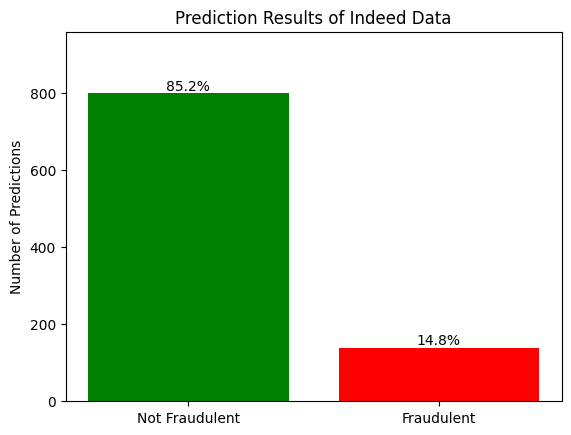

In [169]:
plot_predictions(indeed_binary_predictions, "Indeed")

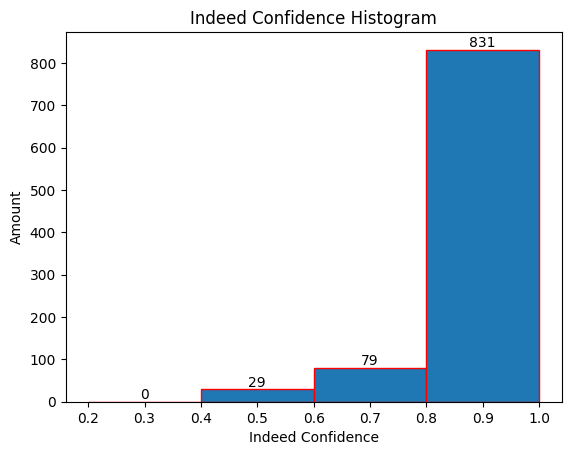

In [185]:
plot_confidence_histogram(indeed_confidence, "Indeed")

In [204]:
indeed_fraudulent_jobs_df = indeed_job_df_clean.iloc[indeed_fraudulent_indices].copy()

indeed_fraudulent_jobs_df.head(20)


,company_name,job_title,benefits,location,salary_formatted,country,description
7,Trinity Underground,Payroll Clerk / Remote,"[""401(k)"",""Dental insurance"",""Health insurance...","Lawrenceville, GA 30044","$48,000 - $85,000 a year",US,Description We are looking for a qualifi...
9,Trinity Underground,Payroll Specialist / Work From Home,"[""401(k)"",""Dental insurance"",""Health insurance...","Suwanee, GA 30024","$48,000 - $85,000 a year",US,Description We are looking for a qualifi...
12,GreenState Credit Union,Mortgage Loan Closer,"[""Work from home""]","North Liberty, IA 52317",$26.02 - $34.84 an hour,US,GreenState Credit Union \n Mortgage Loan Cl...
13,FedEx Logistics,Customs Trade Coordinator- 1st Shift (Work fro...,"[""Dental insurance"",""Paid training"",""Tuition r...","Tonawanda, NY 14150",$15.00 - $21.59 an hour,US,Responsible for coordination of the documenta...
21,LexiCode,"Remote Coders, Outpatient Surgery","[""401(k)"",""Commuter assistance"",""Continuing ed...",Remote,$26 - $34 an hour,US,About Exela Exela is a business proce...
32,Molina Healthcare,"Analyst, Enrollment - Remote","[""Health insurance""]","Louisville, KY",$17.85 - $38.69 an hour,US,Job Description \nJob Summary \nResponsible fo...
48,Premier Performance LLC,Accounts Payable Clerk,"[""401(k) matching"",""Dental insurance"",""Disabil...","Silverdale, WA 98383",$17.50 - $19.00 an hour,US,...
53,Conifer Revenue Cycle Union,Patient Account Representative - Remote,"[""401(k) 6% Match"",""401(k) matching"",""AD&D ins...","Frisco, TX",$17.62 - $24.68 an hour,US,JOB SUMMARY The Patient Account Representati...
58,The Cigna Group,Enrollment/Billing Senior Representative - Eve...,"[""401(k) matching"",""Dental insurance"",""Health ...",Remote,$18 - $28 an hour,US,The Payer Solutions Operations billing team i...
62,Workiva,Client Relationship Manager,"[""401(k) matching"",""RSU""]",Remote,"$53,000 - $90,000 a year",US,Summary\n The Client Relationship Manag...


## LinkedIn Dataset Evaluation

In [ ]:
linkedIn_results, linkedIn_confidence = predict_from_encodings(linkedin_encodings)

In [108]:
linkedIn_binary_predictions = np.array([1 if pred == "Fraudulent" else 0 for pred in linkedIn_results])
linkedIn_fraudulent_indices = np.where(linkedIn_binary_predictions == 1)[0]


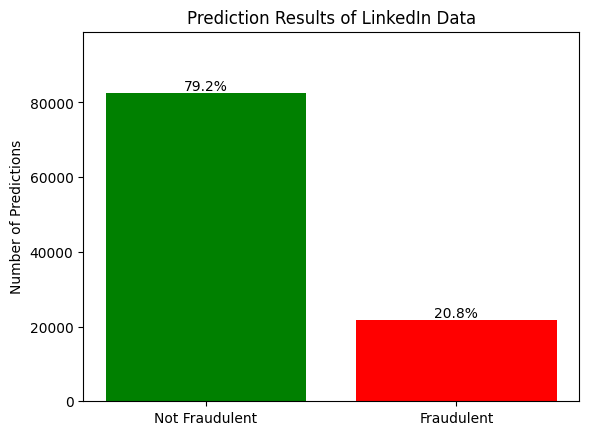

In [170]:
plot_predictions(linkedIn_binary_predictions, "LinkedIn")

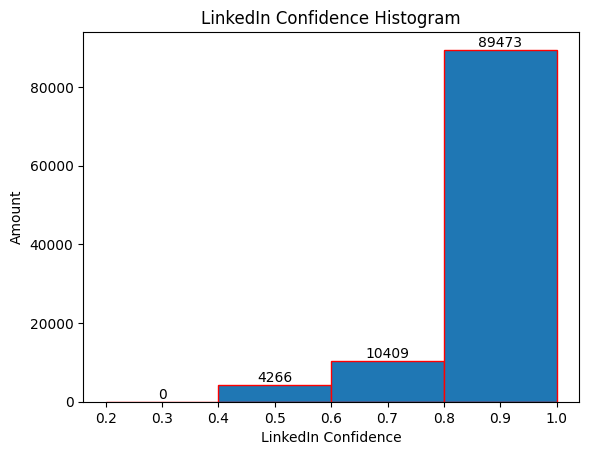

In [158]:
plot_confidence_histogram(linkedIn_confidence, "LinkedIn")

In [203]:
linkedIn_fraudulent_jobs_df = linkedin_job_df_clean.iloc[linkedIn_fraudulent_indices].copy()

linkedIn_fraudulent_jobs_df.head(20)

,company_name,title,description,max_salary,pay_period,location,min_salary,currency
16,CLEVELAND KIDS BOOK BANK,Administrative Coordinator,Job Title: Administrative CoordinatorOrganizat...,NaN,HOURLY,"Cleveland, OH",NaN,USD
18,United Methodists of Greater New Jersey,"Content Writer, Communications","Application opening date: April 24, 2024\nTitl...",NaN,NaN,Greater Philadelphia,NaN,NaN
21,NaN,Licensed Acupuncturist,Why Work Here?“We’re a growing holistic health...,NaN,NaN,"Maumee, OH",NaN,NaN
22,NaN,Software Engineer,"Education Bachelor's degree in software, math,...",NaN,NaN,Los Angeles Metropolitan Area,NaN,NaN
28,NaN,General Laborer,Looking for a General Laborer for our real est...,24.0,HOURLY,"Erie, PA",18.0,USD
32,Fidelity National Title / Law Firm,Legal Secretary,Description Legal secretary/assistant needed f...,NaN,NaN,"Phoenix, AZ",NaN,NaN
34,Atrium Centers,Registered Nurse,We currently need the following team members a...,NaN,NaN,"Grayling, MI",NaN,NaN
44,Orlando Credit Union,External Mortgage Loan Officer,Full job description SummaryWorks with branch ...,NaN,NaN,"Orlando, FL",NaN,NaN
45,"Blackland Home Inspections, PLLC",TREC licensed Professional Home Inspector,Candidate is required to have a valid professi...,28.0,HOURLY,Dallas-Fort Worth Metroplex,24.0,USD
46,NaN,"Manager, Retail Pharmacy",SUMMARY:Manages operation and supervises all d...,165000.0,YEARLY,"Tucson, AZ",110000.0,USD


## SMS Test Evaluation

In [118]:
sms_encodings = tokenize_data(X_test_sms, tokenizer)
sms_results, sms_confidence = predict_from_encodings(sms_encodings)

In [121]:
sms_binary_predictions = np.array([1 if pred == "Fraudulent" else 0 for pred in sms_results])
sms_fraudulent_indices = np.where(sms_binary_predictions == 1)[0]


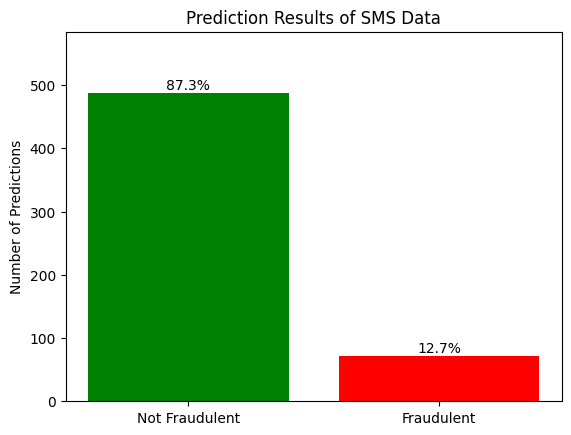

In [172]:
plot_predictions(sms_binary_predictions, "SMS")

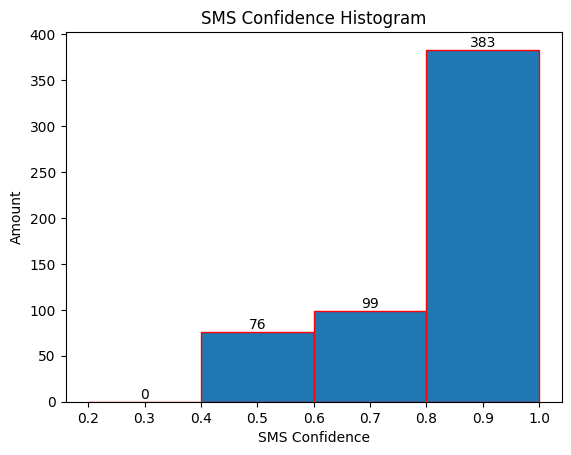

In [186]:
plot_confidence_histogram(sms_confidence, "SMS")

In [202]:
sms_fraudulent_df = sms_df_clean_sw.iloc[sms_fraudulent_indices].copy()

sms_fraudulent_df.head(20)

,sms,label
7,as per your request 'melle melle (oru minnamin...,0
14,i have a date on sunday with will!!,0
24,ffffffffff. alright no way i can meet up with ...,0
35,yup... ok i go home look at the timings then i...,0
47,"fair enough, anything going on?",0
50,what you thinked about me. first time you saw ...,0
51,"a gram usually runs like &lt;#&gt; , a half ei...",0
61,ha ha ha good joke. girls are situation seekers.,0
64,ok lar i double check wif da hair dresser alre...,0
65,"as a valued customer, i am pleased to advise y...",1


## Email Test Evaluation

In [132]:
email_encodings = tokenize_data(X_test_email, tokenizer)
email_results, email_confidence = predict_from_encodings(email_encodings)

In [133]:
email_binary_predictions = np.array([1 if pred == "Fraudulent" else 0 for pred in email_results])
email_fraudulent_indices = np.where(email_binary_predictions == 1)[0]

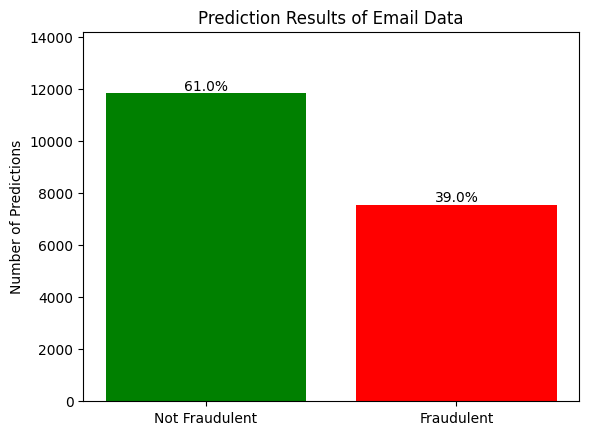

In [173]:
plot_predictions(email_binary_predictions, "Email")

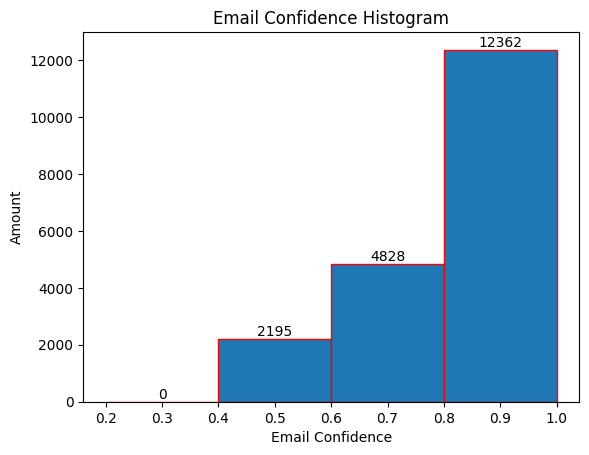

In [201]:
plot_confidence_histogram(email_confidence, "Email")

In [205]:
email_fraudulent_df = email_df_clean_sw.iloc[email_fraudulent_indices].copy()

email_fraudulent_df.head(20)

,label,text
0,1,viiiiiiagraaaa only for the ones that want to ...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
14,1,greetings netherlands intend take time unduly ...
16,1,dear customer it's not a secret that there are...
19,0,netflix inc stock quote notification stock inf...
21,1,joowdsrfjgrb kfj slgxvnielp hwgwhsinq pv sw zpq
